# EDA Pingüinos - Palmer

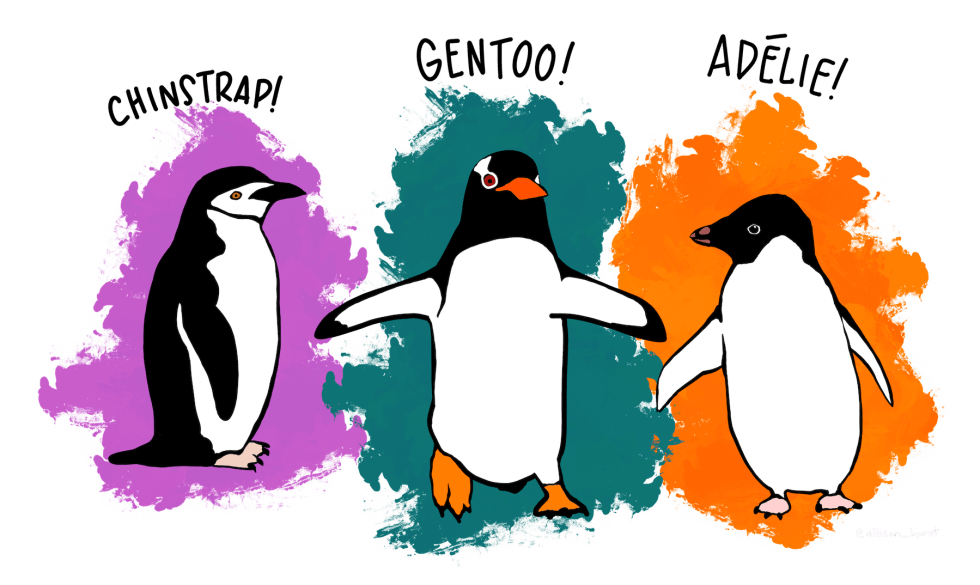

## Librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Carga de Datos

In [3]:
df = pd.read_csv('data/penguins_size.csv')

## Primera Exploración

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
df.shape

(344, 7)

In [9]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [25]:
for i in df.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(df[i].nunique()/df.shape[0])*100:.2f}%")

La cardinalidad de la variable species es 0.87%
La cardinalidad de la variable island es 0.87%
La cardinalidad de la variable sex es 0.58%


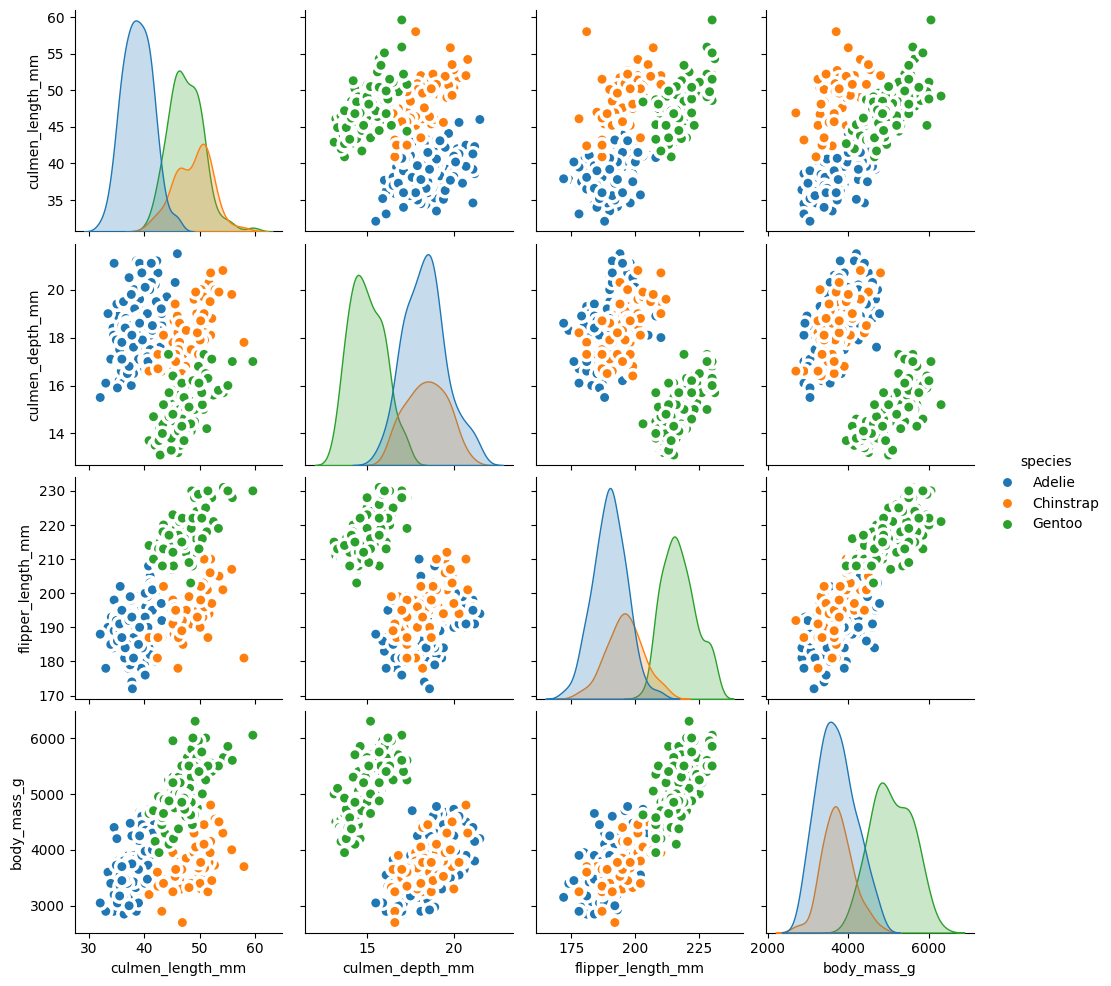

In [17]:
sns.pairplot(df, kind='scatter', hue='species',
            plot_kws=dict(s=80, edgecolor='white',linewidth=2.5));

## Hipótesis

### Estadísticas

1. Tamaño y Sexo
2. Especie y Caracteristica Fisica
3. Aleta y Masa Corporal
4. Distribución de Normalidad

### Gráficamente

1. Distribución de las Características por Isla
2. Relación entre Longitud y Profundidad del Pico
3. Interacción entre Especies, Islas y Características Físicas
4. Gráfico de Normalidad

## Limpieza

In [23]:
df['sex'].replace('.',np.nan,inplace=True)

In [160]:
df1 =df[(df['culmen_length_mm'].isna()) | (df['culmen_depth_mm'].isna()) | (df['flipper_length_mm'].isna()) | (df['body_mass_g'].isna()) | (df['sex'].isna())]
df1

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [147]:
# df.groupby(['species','sex','island']).mean(numeric_only=True).reset_index()
datos_imp = df.groupby(['species','sex','island'])[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']].aggregate(
    {'culmen_length_mm':'mean','culmen_depth_mm':'mean','flipper_length_mm':'median','body_mass_g':'median'}).reset_index()
datos_imp

,species,sex,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,FEMALE,Biscoe,37.359091,17.704545,187.0,3375.0
1,Adelie,FEMALE,Dream,36.911111,17.618519,188.0,3400.0
2,Adelie,FEMALE,Torgersen,37.554167,17.550000,189.0,3400.0
3,Adelie,MALE,Biscoe,40.590909,19.036364,191.0,4000.0
4,Adelie,MALE,Dream,40.071429,18.839286,190.5,3987.5
5,Adelie,MALE,Torgersen,40.586957,19.391304,195.0,4000.0
6,Chinstrap,FEMALE,Dream,46.573529,17.588235,192.0,3550.0
7,Chinstrap,MALE,Dream,51.094118,19.252941,200.5,3950.0
8,Gentoo,FEMALE,Biscoe,45.563793,14.237931,212.0,4700.0
9,Gentoo,MALE,Biscoe,49.473770,15.718033,221.0,5500.0


In [164]:
from scipy.spatial.distance import euclidean

def impute_sex(row):
    if pd.isna(row['sex']):
        filas_relevantes = datos_imp[(datos_imp['species'] == row['species']) & (datos_imp['island'] == row['island'])]
        min_distancia = float('inf')
        sex_a_imputar = None

        for _, r_row in filas_relevantes.iterrows():
            distancia = euclidean(row[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].fillna(0),
                                 r_row[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])
            if distancia < min_distancia:
                min_distancia = distancia
                sex_a_imputar = r_row['sex']
        
        return sex_a_imputar
    else:
        return row['sex']
    
df['sex'] = df.apply(impute_sex, axis=1)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [165]:
df[(df['culmen_length_mm'].isna()) | (df['culmen_depth_mm'].isna()) | (df['flipper_length_mm'].isna()) | (df['body_mass_g'].isna()) | (df['sex'].isna())]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,FEMALE
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,FEMALE


In [168]:
df.loc[3,'sex'] = np.nan
df.loc[339,'sex'] = np.nan

In [175]:
df2 = df[(df['culmen_length_mm'].isna()) | (df['culmen_depth_mm'].isna()) | (df['flipper_length_mm'].isna()) | (df['body_mass_g'].isna()) | (df['sex'].isna())]

In [174]:
df_imp_2 = df.groupby(['species','island'])[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']].aggregate(
    {'culmen_length_mm':'mean','culmen_depth_mm':'mean','flipper_length_mm':'median','body_mass_g':'median'}).reset_index()

In [184]:
merged_df = pd.merge(df2,df_imp_2,how='left',on=['species','island'])

merged_df = merged_df.assign(culmen_length_mm = lambda x: x['culmen_length_mm_x'].fillna(x['culmen_length_mm_y']),
                 culmen_depth_mm = lambda x: x['culmen_depth_mm_x'].fillna(x['culmen_depth_mm_y']),
                 flipper_length_mm = lambda x: x['flipper_length_mm_x'].fillna(x['flipper_length_mm_y']),
                 body_mass_g = lambda x: x['body_mass_g_x'].fillna(x['body_mass_g_y']))

merged_df = merged_df[df2.columns]
merged_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,38.950980,18.429412,191.0,3700.0,NaN
1,Gentoo,Biscoe,47.504878,14.982114,216.0,5000.0,NaN


In [187]:
merged_df.index = df2.index
merged_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,38.950980,18.429412,191.0,3700.0,NaN
339,Gentoo,Biscoe,47.504878,14.982114,216.0,5000.0,NaN


In [188]:
df.loc[3] = merged_df.loc[3]
df.loc[339] = merged_df.loc[339]

df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100000,18.700000,181.0,3750.0,MALE
1,Adelie,Torgersen,39.500000,17.400000,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.300000,18.000000,195.0,3250.0,FEMALE
3,Adelie,Torgersen,38.950980,18.429412,191.0,3700.0,NaN
4,Adelie,Torgersen,36.700000,19.300000,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,47.504878,14.982114,216.0,5000.0,NaN
340,Gentoo,Biscoe,46.800000,14.300000,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.400000,15.700000,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.200000,14.800000,212.0,5200.0,FEMALE


In [189]:
df['sex'] = df.apply(impute_sex, axis=1)
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### Guardar dataframe

In [191]:
df.to_csv('data/penguins_clean.csv', sep='|', index=False)

## Analisis

### Analsis Univariante

In [ ]:
from Prof.functions import Graph, EDA